### Problem statement

#### Given the images below, you need to put a bounding box around the 2 images below, and then crop the image. A sample of what’s expected in the bounding box is shown below.

#### Technical requirements : Imagine you are doing this in cam scanner, but the view of the image is not top down (imagine this to be coming from a live camera feed) . Also you need to crop only the “Active” page, so for example if there are two pages open, and the other page is only half visible, you only need to crop out and amplify the main page (proxy this for the page that occupies the maximum area)

##### Importing Libraries

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Let's take the 1st sample input image

In [11]:
input_img = cv2.imread("test1.png")

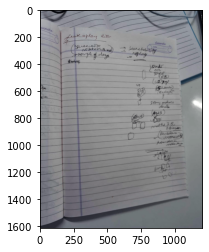

In [12]:
plt.imshow(input_img)

##### Here I am providing the Coordinates for the sample input image and calculating Perspective Transform

In [13]:
original_img_coordinate = np.float32([[153,158], [998,216], [175,1520], [1086,1371]])

for x in range(0,4):
    cv2.circle(input_img, (original_img_coordinate[x][0], original_img_coordinate[x][1]), 5, (255,0,0), -1)

In [14]:
height, width = 450,350

new_img_coordinate = np.float32([[0,0], [width, 0], [0,height], [width,height]])

P = cv2.getPerspectiveTransform(original_img_coordinate, new_img_coordinate)

final_img = cv2.warpPerspective(input_img, P, (width,height))

cv2.imwrite('final_cropped_img1.png', final_img)

True

##### This is our Final Output image after cropping (1st sample input image)

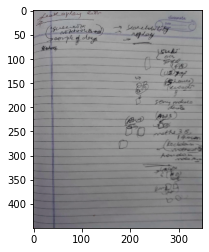

In [15]:
img = cv2.imread("final_cropped_img1.png")
plt.imshow(img)

##### Now, Let's check the 2nd sample input

In [16]:
input_img = cv2.imread("test2.png")

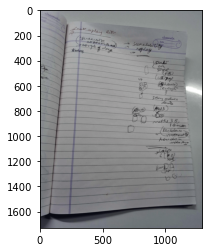

In [17]:
plt.imshow(input_img)

##### Here I am providing the Coordinates for the sample input image and calculating Perspective Transform

In [18]:
original_img_coordinate = np.float32([[212,122], [1169,184], [78,1604], [1232,1535]])

for x in range(0,4):
    cv2.circle(input_img, (original_img_coordinate[x][0], original_img_coordinate[x][1]), 5, (255,0,0), -1)

In [19]:
height, width = 450,350

new_img_coordinate = np.float32([[0,0], [width, 0], [0,height], [width,height]])

P = cv2.getPerspectiveTransform(original_img_coordinate, new_img_coordinate)

final_img = cv2.warpPerspective(input_img, P, (width,height))

cv2.imwrite('final_cropped_img2.png', final_img)

True

##### This is our Final Output image after cropping (2nd sample input image)

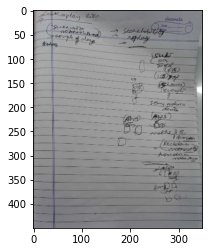

In [20]:
img = cv2.imread("final_cropped_img2.png")
plt.imshow(img)

##### High Level Overview of the Project

As suggested in the problem statement, we have to take a sample picture as an input and we need to crop only the "Active" page, so for example if there are two pages open, and the other page is only half visible, we only need to crop out and amplify the main page.

So, I took the input images and then the coordinates of sample images and marked them on those coordinates (top left, top right, bottom right, bottom left) and cropped them with Perspective Transform and got the desired output.

We can also generate automated coordinates to automate the process even further, but openCV some time does not give accurate results, so I choose this method to get more accurate results. Thanks